# Analysis

Create your own EDA below! Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

In [12]:
import pandas as pd 
import numpy as np
from scipy.stats import pearsonr


import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# import coffee data
coffee = pd.read_csv("../data/crop/coffee_output.csv")

# import weather data
weather = pd.read_csv("../data/weather/weather_data.csv")

In [31]:
# TODO: Merge these two dataframes together on the year and subdivision columns

merged_data = pd.merge(coffee, weather, on=["year", "subdivision"], how="inner")

# Filter the merged data to only include Minas Gerais as subdivision
merged_data = merged_data[merged_data["subdivision"] == "Minas Gerais"]


In [32]:
# TODO: View the first 5 rows of your data

merged_data.head()

,country,subdivision,type,60kgs_bag,year,nonbearing_trees,bearing_trees,nonbear_hectares,bearing_hectares,bearing_trees_per_hectare,nonbearing_trees_per_hectare,rain_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg
0,Brazil,Minas Gerais,Arabica,16.30,2006,581.0,5330.0,175.0,2298.0,2319.0,3320.0,6.670968,21.803087,27.190323,18.654839,97.129032,57.806452,9.706452,2.075207
1,Brazil,Minas Gerais,Arabica,23.70,2007,563.0,5730.0,186.0,2245.0,2552.0,3030.0,1.866250,23.040999,27.649375,18.753125,87.837500,48.493750,8.749375,2.069605
2,Brazil,Minas Gerais,Arabica,16.85,2008,679.0,5720.0,196.0,2235.0,2559.0,3468.0,3.777049,20.682400,27.000000,16.216393,96.136612,51.415301,8.865027,1.584408
3,Brazil,Minas Gerais,Arabica,25.55,2009,663.0,5770.0,188.0,2223.0,2596.0,3527.0,3.380220,21.023802,27.769231,16.410440,96.054945,49.329670,9.114286,1.611746
4,Brazil,Minas Gerais,Arabica,22.10,2010,873.0,5725.0,244.0,2151.0,2662.0,3578.0,2.183516,21.444293,28.580769,16.156044,95.247253,44.648352,9.109341,1.455907


In [33]:
# TODO: Check for null values 

merged_data.isnull().sum()

country                         0
subdivision                     0
type                            0
60kgs_bag                       0
year                            0
nonbearing_trees                1
bearing_trees                   1
nonbear_hectares                1
bearing_hectares                1
bearing_trees_per_hectare       1
nonbearing_trees_per_hectare    1
rain_max                        0
temp_avg                        0
temp_max                        0
temp_min                        0
hum_max                         0
hum_min                         0
wind_max                        0
wind_avg                        0
dtype: int64

In [35]:
# TODO: Drop rows that contain null values

merged_data = merged_data.dropna()

# Check for null values again
merged_data.isnull().sum()

# Reset the index
merged_data = merged_data.reset_index(drop=True)

# Inspect the first 5 rows of the merged data
merged_data.head() 


,country,subdivision,type,60kgs_bag,year,nonbearing_trees,bearing_trees,nonbear_hectares,bearing_hectares,bearing_trees_per_hectare,nonbearing_trees_per_hectare,rain_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg
0,Brazil,Minas Gerais,Arabica,16.30,2006,581.0,5330.0,175.0,2298.0,2319.0,3320.0,6.670968,21.803087,27.190323,18.654839,97.129032,57.806452,9.706452,2.075207
1,Brazil,Minas Gerais,Arabica,23.70,2007,563.0,5730.0,186.0,2245.0,2552.0,3030.0,1.866250,23.040999,27.649375,18.753125,87.837500,48.493750,8.749375,2.069605
2,Brazil,Minas Gerais,Arabica,16.85,2008,679.0,5720.0,196.0,2235.0,2559.0,3468.0,3.777049,20.682400,27.000000,16.216393,96.136612,51.415301,8.865027,1.584408
3,Brazil,Minas Gerais,Arabica,25.55,2009,663.0,5770.0,188.0,2223.0,2596.0,3527.0,3.380220,21.023802,27.769231,16.410440,96.054945,49.329670,9.114286,1.611746
4,Brazil,Minas Gerais,Arabica,22.10,2010,873.0,5725.0,244.0,2151.0,2662.0,3578.0,2.183516,21.444293,28.580769,16.156044,95.247253,44.648352,9.109341,1.455907


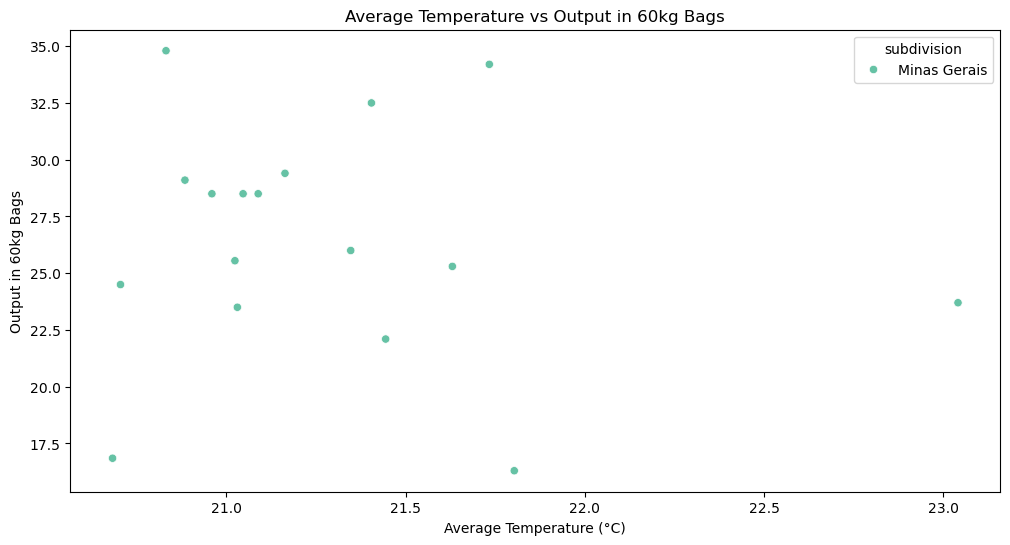

Pearson Correlation Coefficient between Average Temperature and Output in 60kg Bags: -0.125
The p-value is: 0.633


In [46]:
# TODO: BEGIN YOUR EDA!

#Bivariate Analysis

# Plot the relationship between average temperature and output in 60kg bags
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_data, x="temp_avg", y="60kgs_bag",  palette="Set2", hue="subdivision")
plt.title("Average Temperature vs Output in 60kg Bags")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Output in 60kg Bags")
plt.show()

# Calculate the correlation between average temperature and output in 60kg bags
from scipy.stats import pearsonr
r_value, p_value = pearsonr(merged_data["temp_avg"], merged_data["60kgs_bag"])
print(f"Pearson Correlation Coefficient between Average Temperature and Output in 60kg Bags: {r_value:.3f}")
print(f"The p-value is: {p_value:.3f}")




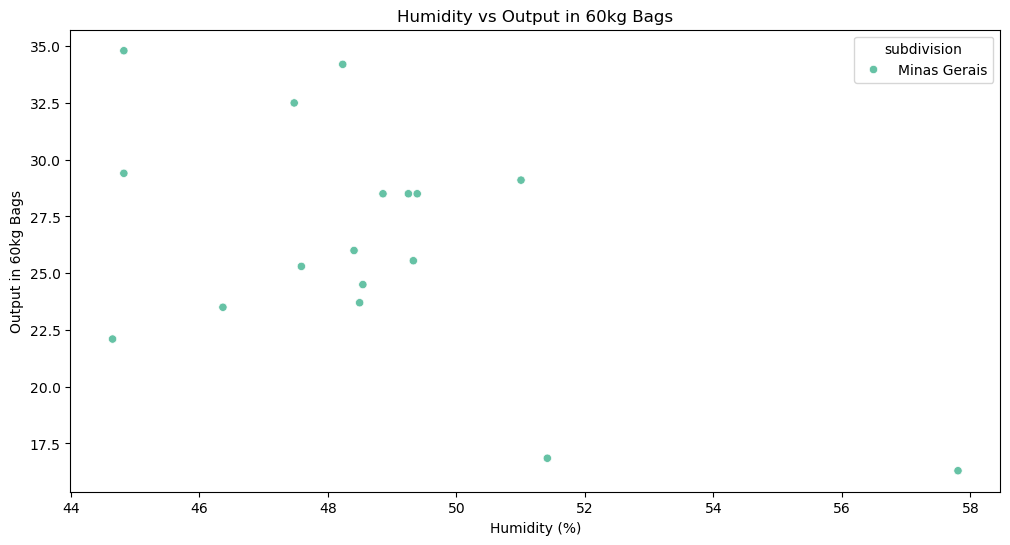

Pearson Correlation Coefficient between Humidity and Output in 60kg Bags: -0.540
The p-value is: 0.025


In [45]:
# TODO: BEGIN YOUR EDA!

#Bivariate Analysis

# Plot the relationship between humidity and output in 60kg bags
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_data, x="hum_min", y="60kgs_bag",  palette="Set2", hue="subdivision")
plt.title("Humidity vs Output in 60kg Bags")
plt.xlabel("Humidity (%)")
plt.ylabel("Output in 60kg Bags")
plt.show()

# Calculate the correlation between humidity and output in 60kg bags    
r_value, p_value = pearsonr(merged_data["hum_min"], merged_data["60kgs_bag"])
print(f"Pearson Correlation Coefficient between Humidity and Output in 60kg Bags: {r_value:.3f}")
print(f"The p-value is: {p_value:.3f}")

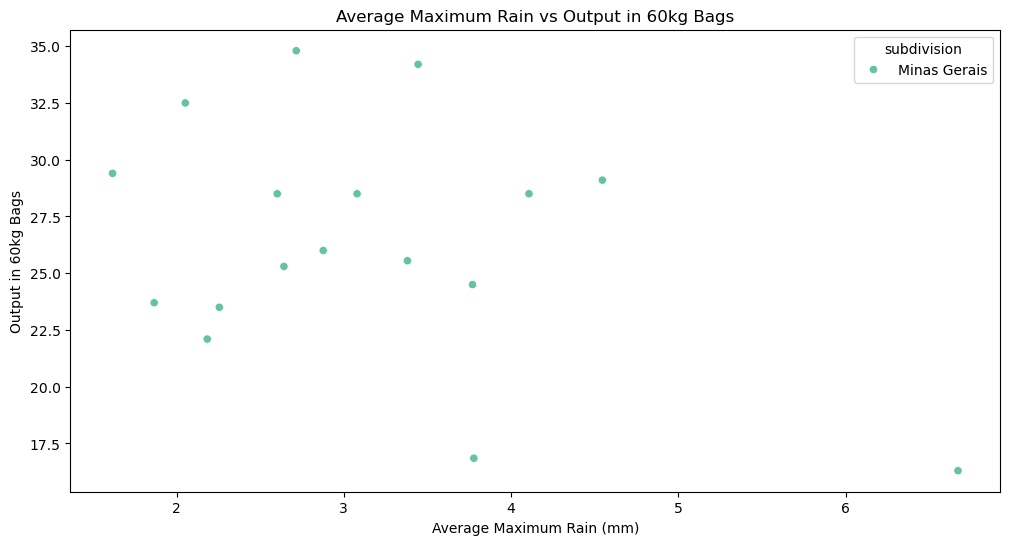

Pearson Correlation Coefficient between Average Maximum Rain and Output in 60kg Bags: -0.396
The p-value is: 0.116


In [44]:
# TODO: BEGIN YOUR EDA!

#Bivariate Analysis

# Plot the relationship between average maximum rain and output in 60kg bags
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_data, x="rain_max", y="60kgs_bag",  palette="Set2", hue="subdivision")
plt.title("Average Maximum Rain vs Output in 60kg Bags")
plt.xlabel("Average Maximum Rain (mm)")
plt.ylabel("Output in 60kg Bags")
plt.show()

# Calculate the correlation between average maximum rain and output in 60kg bags
r_value, p_value = pearsonr(merged_data["rain_max"], merged_data["60kgs_bag"])
print(f"Pearson Correlation Coefficient between Average Maximum Rain and Output in 60kg Bags: {r_value:.3f}")
print(f"The p-value is: {p_value:.3f}")

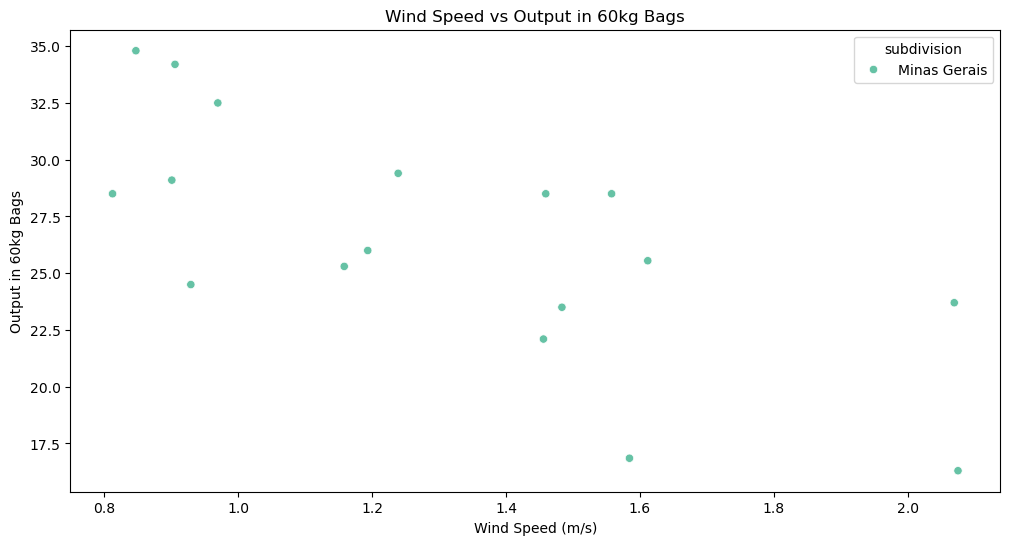

Pearson Correlation Coefficient between Wind Speed and Output in 60kg Bags: -0.707
The p-value is: 0.001


In [43]:
# TODO: BEGIN YOUR EDA!

#Bivariate Analysis

# Plot the relationship between wind speed and output in 60kg bags
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_data, x="wind_avg", y="60kgs_bag",  palette="Set2", hue="subdivision")   
plt.title("Wind Speed vs Output in 60kg Bags")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Output in 60kg Bags")
plt.show()
# Calculate the correlation between wind speed and output in 60kg bags
r_value, p_value = pearsonr(merged_data["wind_avg"], merged_data["60kgs_bag"])
print(f"Pearson Correlation Coefficient between Wind Speed and Output in 60kg Bags: {r_value:.3f}")
print(f"The p-value is: {p_value:.3f}")

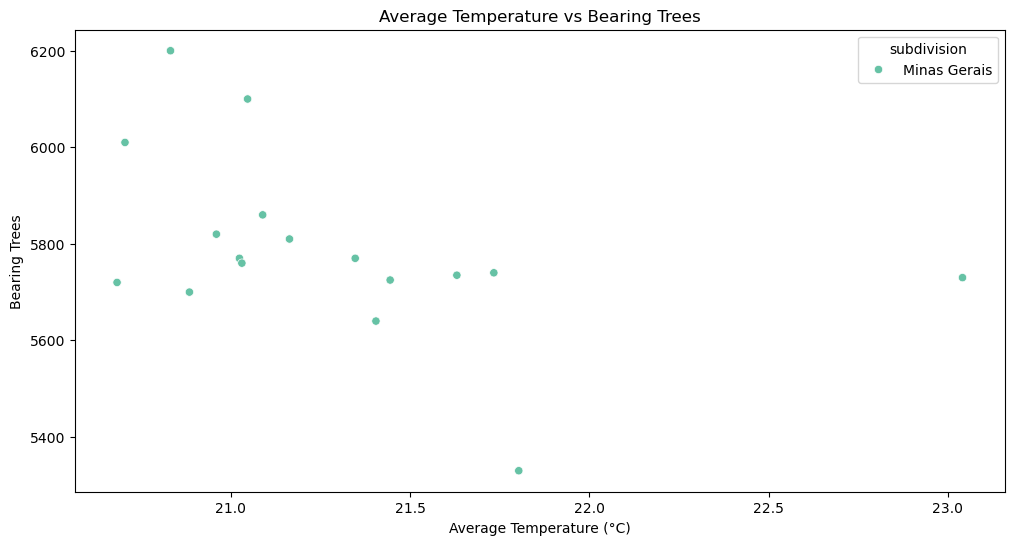

Pearson Correlation Coefficient between Average Temperature and Bearing Trees: -0.427
The p-value is: 0.087


In [48]:
# TODO: BEGIN YOUR EDA!

#Bivariate Analysis

# Plot the relationship between average temperature and amount of bearing trees 
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_data, x="temp_avg", y="bearing_trees",  palette="Set2", hue="subdivision")
plt.title("Average Temperature vs Bearing Trees")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Bearing Trees")
plt.show()

# Calculate the correlation between average temperature and the amount of bearing trees 
r_value, p_value = pearsonr(merged_data["temp_avg"], merged_data["bearing_trees"])  
print(f"Pearson Correlation Coefficient between Average Temperature and Bearing Trees: {r_value:.3f}")
print(f"The p-value is: {p_value:.3f}")

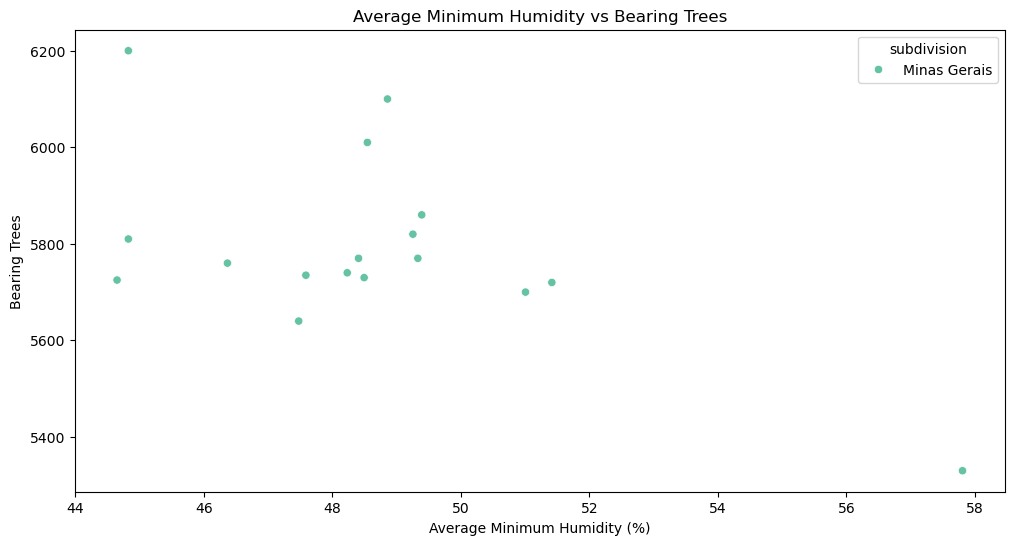

Pearson Correlation Coefficient between Average Minimum Humidity and Bearing Trees: -0.593
The p-value is: 0.012


In [49]:
# TODO: BEGIN YOUR EDA!

#Bivariate Analysis

# Plot the relationship between average minimum humidity and amount of bearing trees 
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_data, x="hum_min", y="bearing_trees",  palette="Set2", hue="subdivision")
plt.title("Average Minimum Humidity vs Bearing Trees")
plt.xlabel("Average Minimum Humidity (%)")
plt.ylabel("Bearing Trees")
plt.show()

# Calculate the correlation between average minimum humidity and the amount of bearing trees
r_value, p_value = pearsonr(merged_data["hum_min"], merged_data["bearing_trees"])
print(f"Pearson Correlation Coefficient between Average Minimum Humidity and Bearing Trees: {r_value:.3f}")
print(f"The p-value is: {p_value:.3f}")

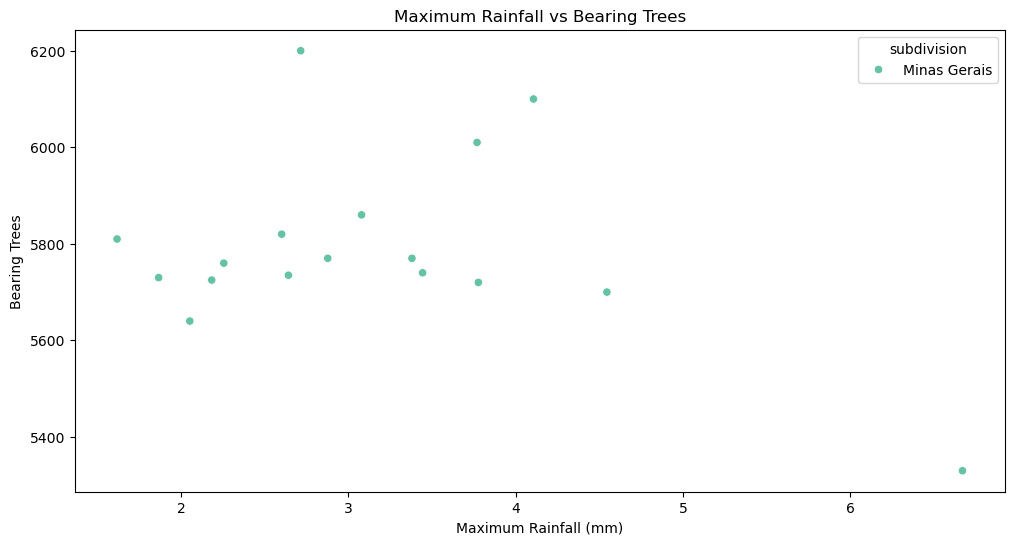

Pearson Correlation Coefficient between Maximum Rainfall and Bearing Trees: -0.333
The p-value is: 0.192


In [51]:
# TODO: BEGIN YOUR EDA!

#Bivariate Analysis

# Plot the relationship between maximum rainfall and amount of bearing trees 
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_data, x="rain_max", y="bearing_trees",  palette="Set2", hue="subdivision")
plt.title("Maximum Rainfall vs Bearing Trees")
plt.xlabel("Maximum Rainfall (mm)")     
plt.ylabel("Bearing Trees")
plt.show()

# Calculate the correlation between maximum rainfall and the amount of bearing trees
r_value, p_value = pearsonr(merged_data["rain_max"], merged_data["bearing_trees"])
print(f"Pearson Correlation Coefficient between Maximum Rainfall and Bearing Trees: {r_value:.3f}") 
print(f"The p-value is: {p_value:.3f}")

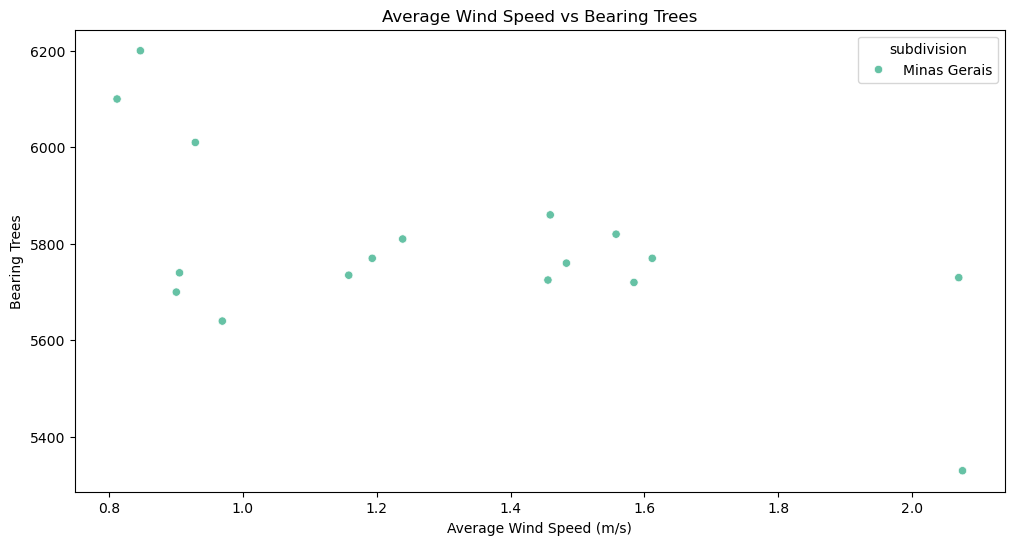

Pearson Correlation Coefficient between Average Wind Speed and Bearing Trees: -0.599
The p-value is: 0.011


In [52]:
# TODO: BEGIN YOUR EDA!

#Bivariate Analysis

# Plot the relationship between average wind speed and amount of bearing trees 
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_data, x="wind_avg", y="bearing_trees",  palette="Set2", hue="subdivision")
plt.title("Average Wind Speed vs Bearing Trees")
plt.xlabel("Average Wind Speed (m/s)")
plt.ylabel("Bearing Trees")
plt.show()

# Calculate the correlation between average wind speed and the amount of bearing trees
r_value, p_value = pearsonr(merged_data["wind_avg"], merged_data["bearing_trees"])
print(f"Pearson Correlation Coefficient between Average Wind Speed and Bearing Trees: {r_value:.3f}")
print(f"The p-value is: {p_value:.3f}")


## Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof! Look back to W6D3 for more context.

What is the relationship between temp_avg and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.

Answer 

The correlation between the average temperature and 60kgs bag indicates a very weak negative relationship. With a Pearson coefficient of -0.125 this indicates that as the average temperature is increasing, the number of 60kg bags of coffee produced decreases minimally. Given the p-value of 0.633, which is greater than 0.05, we say that the relationship is not statistically significant. We cannot confidently conclude that increased temperature leads to less coffee production. The scatter plot created also confirms this by showing an somewhat negative downward trend. 

What is the relationship between minimum humidity and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.

Answer 

The correlation between the minimum humidity and 60kgs bag indicates a moderate negative relationship. With a Pearson coefficient of -0.540, this indicates that as the average minimum humidity is increasing, the number of 60kg bags of coffee produced decreases. Given the p-value of 0.025, which is less than 0.05, we say that the relationship is  statistically significant; indicating that higher minimum humidity levels is linked to lower bags of coffee. The scatter plot created also does not necessairily confirm this but it does show the negative pattern.




What is the relationship between rain_max and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.

Answer 

The correlation between the average maximum rainfall and 60kgs bag indicates a weak negative relationship. With a Pearson coefficient of -0.396, this indicates that as the average maximum rain increases, the number of 60kg bags of coffee produced decreases. Given the p-value of 0.116, which is greater than 0.05, we say that the relationship is not statistically significant. We cannot confidently conclude that more rain leads to less coffee production. The scatter plot created although is hard to read, also confirms this as it shows a weak negative pattern.


What is the relationship between average wind speed and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.

Answer 

The correlation between the average wind speed and 60kgs bag indicates a strong positive relationship. With a Pearson coefficient of -0.707, this indicates that as the average wind speed increases, the number of 60kg bags of coffee produced decreases. Given the p-value of 0.001, which is less than 0.05; indicating that higher wind speed levels is linked to lower bags of coffee. The scatter plot confirms this as it shows a strong negative pattern.


Perform the same bivariate analysis between the mentioned weather columns (temp_avg, hum_min, rain_max, and wind_avg) and a coffee-related column of your choice (bearing_trees, nonbearing_trees, bearing_trees_per_hectare, etc). Which directions do these relationships follow? What are the strengths of these relationships?

Answer 

Average Temperature and Bearing Trees 

The correlation between the average temperature and the amount of bearing trees indicates a moderate negative relationship. With a Pearson coefficient of -0.427, this indicates that as the average temperature increases, the amount of bearing coffee trees moderately decreases. Given the p-value of 0.087, which is greater than 0.05, we say that the relationship is not statistically significant. We cannot confidently conclude that increasing the average temperature leads to less bearing trees. The scatter plot confirms this as it shows a moderate negative pattern.

Average Minimum Humidity and Bearing Trees 

The correlation between the average minimum humidity and the amount of bearing trees indicates a moderate negative relationship. With a Pearson coefficient of -0.593, this indicates that as the average minimum humidity increases, the amount of bearing coffee trees moderately decreases. Given the p-value of 0.012, which is less than 0.05, we say that the relationship is statistically significant;indicating that higher average minimum humidity levels is linked to lower amounts of bearing coffee trees. The scatter plot confirms this as it shows a moderate negative pattern.

Average Maximum Rainfall and Bearing Trees 

The correlation between the average maximum rainfall and the amount of bearing trees indicates a weak negative relationship. With a Pearson coefficient of -0.333, this indicates that as the average maximum rainfall increases, the amount of bearing coffee trees slightly decreases. Given the p-value of 0.192, which is greater than 0.05, we say that the relationship is not statistically significant. We cannot confidently conclude that increasing the average maximum rainfull leads to less bearing trees. The scatter plot is difficult to read but it confirms this as it shows a weak negative pattern.


Average Wind Speed and Bearing Trees

The correlation between the average wind speed and the amount of bearing trees indicates a moderate negative relationship. With a Pearson coefficient of -0.599, this indicates that as the average minimum humidity increases, the amount of bearing coffee trees moderately decreases. Given the p-value of 0.011, which is less than 0.05, we say that the relationship is statistically significant;indicating that higher average wind speeds is linked to lower amounts of bearing coffee trees. The scatter plot confirms this as it shows a moderate negative pattern.




Which weather factor seems to influence coffee production the most? 

Based on the data above, all weather factors had negative correlations with the amount of bearing trees, hence coffee production. However, in Minas Gerais, the average wind speed had the strongest negative correlation (-0.599) and it was statistically significant (p =0.011), indicating that the higher average wind speeds is will end up lowering the amounts of bearing coffee trees.  

Which data would you collect to continue exploring the impacts of weather and economic forces on coffee production?

Answer 

If I had to continue exploring the impacts of weather and economic forces on coffee production, I would like to collect data on the following: 
1. Soil moisture and quality, as I would like to know if the quality of soil affects the coffee production 
2. Economic stability of the country, as I would like to know if any wars or political instability/decisions potentially affected coffee production 
3. Market Prices, as I would like to know if flucctuations in prices affected farmers willingness to plant more crops 
4. Export events, as I would like to know if there was a decrease or increase in exporting that affected coffee production 

If you were preparing a report to provide coffee farmers, which weather condititions would you state are the most favorable for coffee growing (assuming any exist)?

Answer 

Based on the data examined throughout this case, I would start with the average wind speed, as it showed a moderate negative correlation, letting farmers know that lower wind speeds would lead to better coffee production. Also, to pay attention to  other variables such as rainfall, temperature and humidity which should all be gotten in moderation as extreme ends would not be favorable. 